In [31]:
from __future__ import division, print_function
import warnings
warnings.filterwarnings('ignore')
%pylab inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
import pandas as pd
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [55]:
df = pd.read_csv('experiment/info.csv', sep=';')
df.head()

,name,old_size,new_size,operations,algo,set,action,num
0,set_80_3_3.txt,81932,64691,876204,haff,3,c,3
1,set_80_3_3.txt,81932,64758,907404,shan,3,c,3
2,set_3_1_3.txt,3006831,2185347,28692135,haff,1,c,3
3,set_3_1_3.txt,3006831,2185676,31696944,shan,1,c,3
4,set_3_3_3.txt,3006959,2343036,30156418,haff,3,c,3


In [56]:
df['size'] = df['name'].apply(lambda x: int(x.split('_')[1]))
df.head()

,name,old_size,new_size,operations,algo,set,action,num,size
0,set_80_3_3.txt,81932,64691,876204,haff,3,c,3,80
1,set_80_3_3.txt,81932,64758,907404,shan,3,c,3,80
2,set_3_1_3.txt,3006831,2185347,28692135,haff,1,c,3,3
3,set_3_1_3.txt,3006831,2185676,31696944,shan,1,c,3,3
4,set_3_3_3.txt,3006959,2343036,30156418,haff,3,c,3,3


In [57]:
df[(df['size'] == 100) & (df['set'] == 1) & (df['algo'] == 'haff') & (df['action'] == 'c')]

,name,old_size,new_size,operations,algo,set,action,num,size
56,set_100_1_1.txt,106509,77611,1021542,haff,1,c,1,100
98,set_100_1_2.txt,106509,77601,1021454,haff,1,c,2,100
108,set_100_1_3.txt,106509,77626,1021673,haff,1,c,3,100


In [58]:
goods = []

In [62]:
df_cpy = df.sort(columns=['name', 'num'])
# for i in range (0, 5):
df_cpy = df_cpy.iloc[3::4, :]
while df_cpy.shape[0] != 0:
    df_cpy.iloc[:3, 3] = df_cpy.iloc[:3, 3].mean()
    goods.append(df_cpy.iloc[0])
    df_cpy.drop(df_cpy.head(3).index, inplace=True)

In [63]:
df_new = pd.DataFrame(goods)
# df_new.to_csv('filtered.csv')

df_new['operations'] = df_new['operations'].apply(lambda x: int(x))
df_new.head()

,name,old_size,new_size,operations,algo,set,action,num,size
201,set_100_1_1.haff,77611,106509,1427272,haff,1,d,1,100
154,set_100_2_1.haff,76829,106512,1435776,haff,2,d,1,100
215,set_100_3_1.haff,83701,106510,1570387,haff,3,d,1,100
151,set_1_1_1.haff,732537,1007739,13462130,haff,1,d,1,1
209,set_1_2_1.haff,724456,1007782,13341756,haff,2,d,1,1


# Первый набор графиков

In [32]:
huff_c_small = df_new[(df_new['action'] == 'c') & (df_new['size'] > 4) & (df_new['algo'] == 'haff')]
huff_c_big = df_new[(df_new['action'] == 'c') & (df_new['size'] < 4) & (df_new['algo'] == 'haff')]
huff_d_small = df_new[(df_new['action'] == 'd') & (df_new['size'] > 4) & (df_new['algo'] == 'haff')]
huff_d_big = df_new[(df_new['action'] == 'd') & (df_new['size'] < 4) & (df_new['algo'] == 'haff')]

shan_c_small = df_new[(df_new['action'] == 'c') & (df_new['size'] > 4) & (df_new['algo'] == 'shan')]
shan_c_big = df_new[(df_new['action'] == 'c') & (df_new['size'] < 4) & (df_new['algo'] == 'shan')]
shan_d_small = df_new[(df_new['action'] == 'd') & (df_new['size'] > 4) & (df_new['algo'] == 'shan')]
shan_d_big = df_new[(df_new['action'] == 'd') & (df_new['size'] < 4) & (df_new['algo'] == 'shan')]

### Хаффман

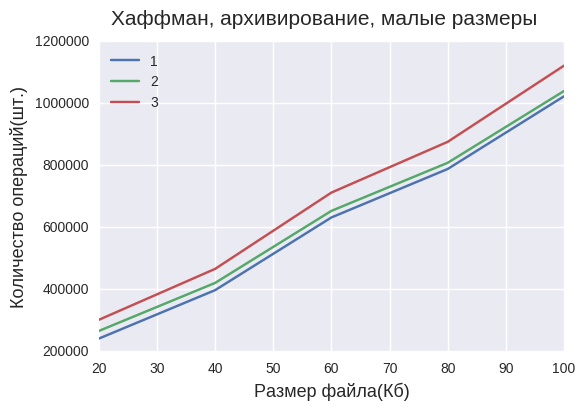

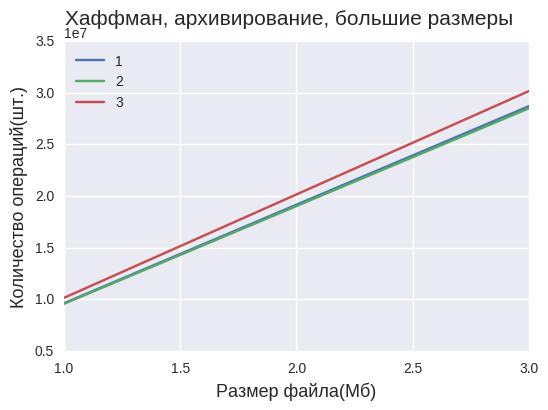

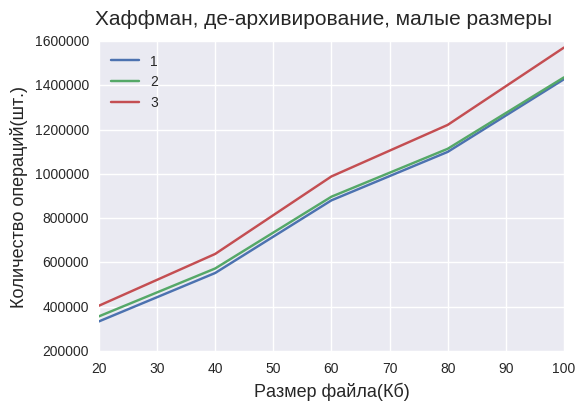

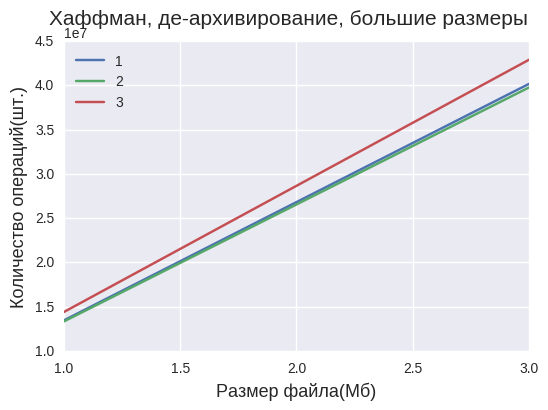

In [33]:
ind_small = huff_c_small['size'].unique()
ind_small.sort()
ind_big = huff_c_big['size'].unique()
ind_big.sort()

set_1 = huff_c_small[huff_c_small['set'] == 1]
set_2 = huff_c_small[huff_c_small['set'] == 2]
set_3 = huff_c_small[huff_c_small['set'] == 3]

set_1.sort(columns='operations', inplace=True)
set_2.sort(columns='operations', inplace=True)
set_3.sort(columns='operations', inplace=True)

fig_1 = plt.figure()

gr_1_1_1_1, = plt.plot(ind_small, set_1['operations'], label='1')
gr_1_1_1_2, = plt.plot(ind_small, set_2['operations'], label='2')
gr_1_1_1_3, = plt.plot(ind_small, set_3['operations'], label='3')

plt.legend(loc=2)

fig_1.suptitle('Хаффман, архивирование, малые размеры', fontsize=15)
plt.xlabel('Размер файла(Кб)', fontsize=13)
plt.ylabel('Количество операций(шт.)', fontsize=13)

fig_1.savefig('figures/1_1_1_1.png', bbox_inches='tight')

# --------------------------------------------------------------------------------

set_1 = huff_c_big[huff_c_big['set'] == 1]
set_2 = huff_c_big[huff_c_big['set'] == 2]
set_3 = huff_c_big[huff_c_big['set'] == 3]

set_1.sort(columns='operations', inplace=True)
set_2.sort(columns='operations', inplace=True)
set_3.sort(columns='operations', inplace=True)

fig_2 = plt.figure()

gr_1_1_2_1, = plt.plot(ind_big, set_1['operations'], label='1')
gr_1_1_2_2, = plt.plot(ind_big, set_2['operations'], label='2')
gr_1_1_2_3, = plt.plot(ind_big, set_3['operations'], label='3')

plt.legend(loc=2)

fig_2.suptitle('Хаффман, архивирование, большие размеры', fontsize=15)
plt.xlabel('Размер файла(Мб)', fontsize=13)
plt.ylabel('Количество операций(шт.)', fontsize=13)

fig_2.savefig('figures/1_1_1_2.png', bbox_inches='tight')


# --------------------------------------------------------------------------------

set_1 = huff_d_small[huff_d_small['set'] == 1]
set_2 = huff_d_small[huff_d_small['set'] == 2]
set_3 = huff_d_small[huff_d_small['set'] == 3]

set_1.sort(columns='operations', inplace=True)
set_2.sort(columns='operations', inplace=True)
set_3.sort(columns='operations', inplace=True)

fig_3 = plt.figure()

gr_1_2_1_1, = plt.plot(ind_small, set_1['operations'], label='1')
gr_1_2_1_2, = plt.plot(ind_small, set_2['operations'], label='2')
gr_1_2_1_3, = plt.plot(ind_small, set_3['operations'], label='3')

plt.legend(loc=2)

fig_3.suptitle('Хаффман, де-архивирование, малые размеры', fontsize=15)
plt.xlabel('Размер файла(Кб)', fontsize=13)
plt.ylabel('Количество операций(шт.)', fontsize=13)

fig_3.savefig('figures/1_1_2_1.png', bbox_inches='tight')




# --------------------------------------------------------------------------------

set_1 = huff_d_big[huff_d_big['set'] == 1]
set_2 = huff_d_big[huff_d_big['set'] == 2]
set_3 = huff_d_big[huff_d_big['set'] == 3]

set_1.sort(columns='operations', inplace=True)
set_2.sort(columns='operations', inplace=True)
set_3.sort(columns='operations', inplace=True)

fig_4 = plt.figure()

gr_1_2_2_1, = plt.plot(ind_big, set_1['operations'], label='1')
gr_1_2_2_2, = plt.plot(ind_big, set_2['operations'], label='2')
gr_1_2_2_3, = plt.plot(ind_big, set_3['operations'], label='3')

plt.legend(loc=2)

fig_4.suptitle('Хаффман, де-архивирование, большие размеры', fontsize=15)
plt.xlabel('Размер файла(Мб)', fontsize=13)
plt.ylabel('Количество операций(шт.)', fontsize=13)

fig_4.savefig('figures/1_1_2_2.png', bbox_inches='tight')


plt.show()

### Шеннон

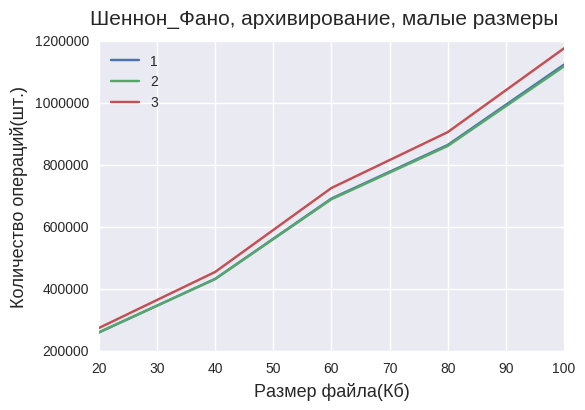

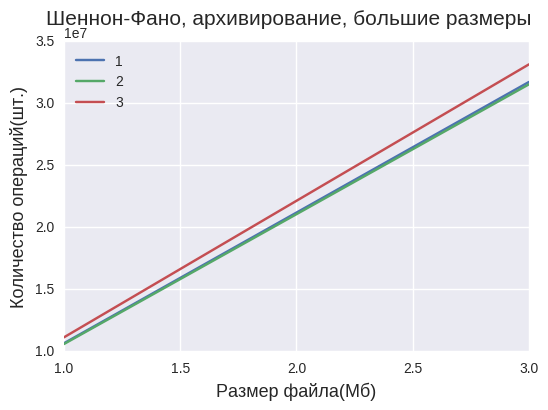

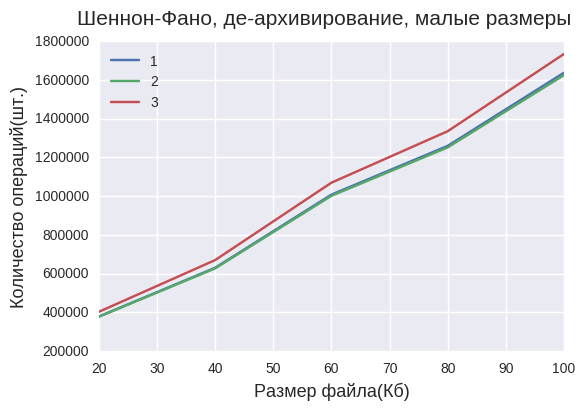

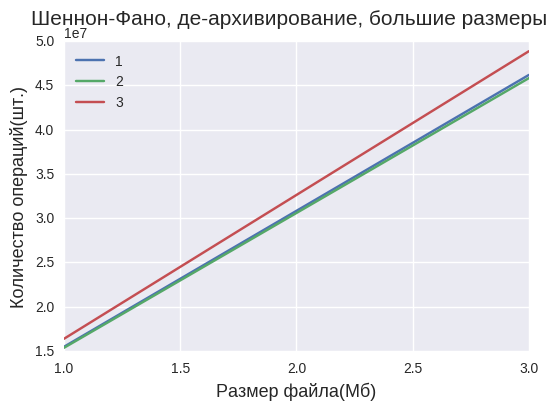

In [34]:
ind_small = shan_c_small['size'].unique()
ind_small.sort()
ind_big = shan_c_big['size'].unique()
ind_big.sort()


set_1 = shan_c_small[shan_c_small['set'] == 1]
set_2 = shan_c_small[shan_c_small['set'] == 2]
set_3 = shan_c_small[shan_c_small['set'] == 3]

set_1.sort(columns='operations', inplace=True)
set_2.sort(columns='operations', inplace=True)
set_3.sort(columns='operations', inplace=True)

fig_1 = plt.figure()

gr_2_1_1_1, = plt.plot(ind_small, set_1['operations'], label='1')
gr_2_1_1_2, = plt.plot(ind_small, set_2['operations'], label='2')
gr_2_1_1_3, = plt.plot(ind_small, set_3['operations'], label='3')

plt.legend(loc=2)

fig_1.suptitle('Шеннон_Фано, архивирование, малые размеры', fontsize=15)
plt.xlabel('Размер файла(Кб)', fontsize=13)
plt.ylabel('Количество операций(шт.)', fontsize=13)

fig_1.savefig('figures/1_2_1_1.png', bbox_inches='tight')

# --------------------------------------------------------------------------------


set_1 = shan_c_big[shan_c_big['set'] == 1]
set_2 = shan_c_big[shan_c_big['set'] == 2]
set_3 = shan_c_big[shan_c_big['set'] == 3]

set_1.sort(columns='operations', inplace=True)
set_2.sort(columns='operations', inplace=True)
set_3.sort(columns='operations', inplace=True)

fig_2 = plt.figure()

gr_2_1_2_1, = plt.plot(ind_big, set_1['operations'], label='1')
gr_2_1_2_2, = plt.plot(ind_big, set_2['operations'], label='2')
gr_2_1_2_3, = plt.plot(ind_big, set_3['operations'], label='3')

plt.legend(loc=2)

fig_2.suptitle('Шеннон-Фано, архивирование, большие размеры', fontsize=15)
plt.xlabel('Размер файла(Мб)', fontsize=13)
plt.ylabel('Количество операций(шт.)', fontsize=13)

fig_2.savefig('figures/1_2_1_2.png', bbox_inches='tight')

# --------------------------------------------------------------------------------

set_1 = shan_d_small[shan_d_small['set'] == 1]
set_2 = shan_d_small[shan_d_small['set'] == 2]
set_3 = shan_d_small[shan_d_small['set'] == 3]

set_1.sort(columns='operations', inplace=True)
set_2.sort(columns='operations', inplace=True)
set_3.sort(columns='operations', inplace=True)

fig_3 = plt.figure()

gr_2_2_1_1, = plt.plot(ind_small, set_1['operations'], label='1')
gr_2_2_1_2, = plt.plot(ind_small, set_2['operations'], label='2')
gr_2_2_1_3, = plt.plot(ind_small, set_3['operations'], label='3')

plt.legend(loc=2)

fig_3.suptitle('Шеннон-Фано, де-архивирование, малые размеры', fontsize=15)
plt.xlabel('Размер файла(Кб)', fontsize=13)
plt.ylabel('Количество операций(шт.)', fontsize=13)

fig_3.savefig('figures/1_2_2_1.png', bbox_inches='tight')

# --------------------------------------------------------------------------------

set_1 = shan_d_big[shan_d_big['set'] == 1]
set_2 = shan_d_big[shan_d_big['set'] == 2]
set_3 = shan_d_big[shan_d_big['set'] == 3]

set_1.sort(columns='operations', inplace=True)
set_2.sort(columns='operations', inplace=True)
set_3.sort(columns='operations', inplace=True)

fig_4 = plt.figure()

gr_2_2_2_1, = plt.plot(ind_big, set_1['operations'], label='1')
gr_2_2_2_2, = plt.plot(ind_big, set_2['operations'], label='2')
gr_2_2_2_3, = plt.plot(ind_big, set_3['operations'], label='3')

plt.legend(loc=2)

fig_4.suptitle('Шеннон-Фано, де-архивирование, большие размеры', fontsize=15)
plt.xlabel('Размер файла(Мб)', fontsize=13)
plt.ylabel('Количество операций(шт.)', fontsize=13)

fig_4.savefig('figures/1_2_2_2.png', bbox_inches='tight')

# --------------------------------------------------------------------------------

plt.show()

# Второй набор графиков

In [35]:
s1_c_small = df_new[(df_new['action'] == 'c') & (df_new['set'] == 1) & (df_new['size'] > 4)]
s1_c_big = df_new[(df_new['action'] == 'c') & (df_new['set'] == 1) & (df_new['size'] < 4)]
s1_d_small = df_new[(df_new['action'] == 'd') & (df_new['set'] == 1) & (df_new['size'] > 4)]
s1_d_big = df_new[(df_new['action'] == 'd') & (df_new['set'] == 1) & (df_new['size'] < 4)]

s2_c_small = df_new[(df_new['action'] == 'c') & (df_new['set'] == 2) & (df_new['size'] > 4)]
s2_c_big = df_new[(df_new['action'] == 'c') & (df_new['set'] == 2) & (df_new['size'] < 4)]
s2_d_small = df_new[(df_new['action'] == 'd') & (df_new['set'] == 2) & (df_new['size'] > 4)]
s2_d_big = df_new[(df_new['action'] == 'd') & (df_new['set'] == 2) & (df_new['size'] < 4)]

s3_c_small = df_new[(df_new['action'] == 'c') & (df_new['set'] == 3) & (df_new['size'] > 4)]
s3_c_big = df_new[(df_new['action'] == 'c') & (df_new['set'] == 3) & (df_new['size'] < 4)]
s3_d_small = df_new[(df_new['action'] == 'd') & (df_new['set'] == 3) & (df_new['size'] > 4)]
s3_d_big = df_new[(df_new['action'] == 'd') & (df_new['set'] == 3) & (df_new['size'] < 4)]

### Первый набор символов

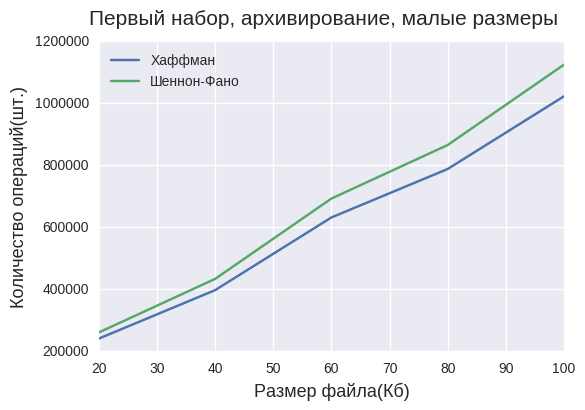

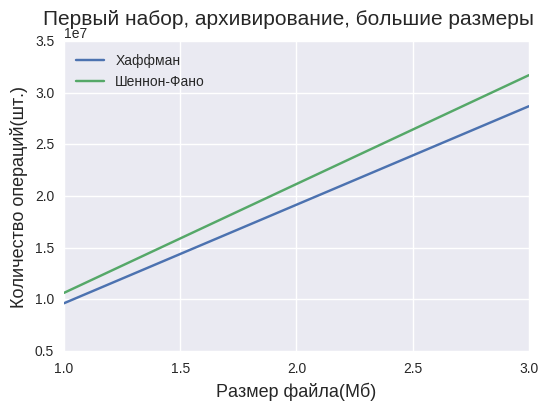

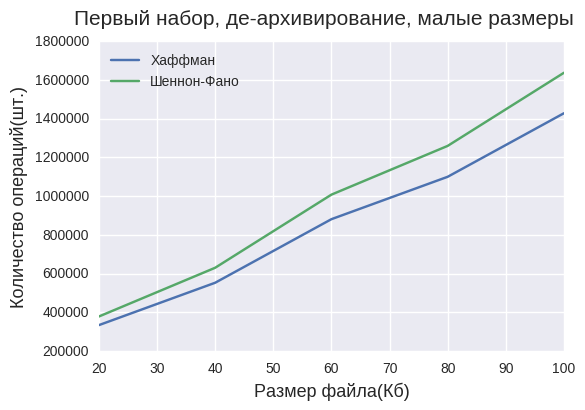

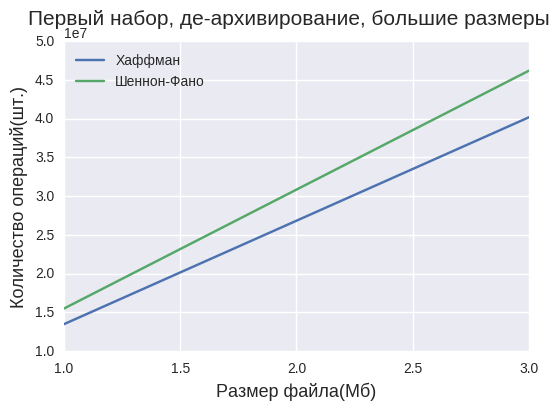

In [36]:
ind_small = s1_c_small['size'].unique()
ind_small.sort()
ind_big = s1_c_big['size'].unique()
ind_big.sort()

haff = s1_c_small[s1_c_small['algo'] == 'haff']
shan = s1_c_small[s1_c_small['algo'] == 'shan']

haff.sort(columns='operations', inplace=True)
shan.sort(columns='operations', inplace=True)

fig_1 = plt.figure()

gr_1_1_1_1, = plt.plot(ind_small, haff['operations'], label='Хаффман')
gr_1_1_1_2, = plt.plot(ind_small, shan['operations'], label='Шеннон-Фано')


plt.legend(loc=2)

fig_1.suptitle('Первый набор, архивирование, малые размеры', fontsize=15)
plt.xlabel('Размер файла(Кб)', fontsize=13)
plt.ylabel('Количество операций(шт.)', fontsize=13)

fig_1.savefig('figures/2_1_1_1.png', bbox_inches='tight')

# --------------------------------------------------------------------------------


haff = s1_c_big[s1_c_big['algo'] == 'haff']
shan = s1_c_big[s1_c_big['algo'] == 'shan']

haff.sort(columns='operations', inplace=True)
shan.sort(columns='operations', inplace=True)

fig_2 = plt.figure()

gr_1_1_2_1, = plt.plot(ind_big, haff['operations'], label='Хаффман')
gr_1_1_2_2, = plt.plot(ind_big, shan['operations'], label='Шеннон-Фано')


plt.legend(loc=2)

fig_2.suptitle('Первый набор, архивирование, большие размеры', fontsize=15)
plt.xlabel('Размер файла(Мб)', fontsize=13)
plt.ylabel('Количество операций(шт.)', fontsize=13)

fig_2.savefig('figures/2_1_1_2.png', bbox_inches='tight')

# --------------------------------------------------------------------------------


haff = s1_d_small[s1_d_small['algo'] == 'haff']
shan = s1_d_small[s1_d_small['algo'] == 'shan']

haff.sort(columns='operations', inplace=True)
shan.sort(columns='operations', inplace=True)

fig_3 = plt.figure()

gr_1_2_1_1, = plt.plot(ind_small, haff['operations'], label='Хаффман')
gr_1_2_1_2, = plt.plot(ind_small, shan['operations'], label='Шеннон-Фано')


plt.legend(loc=2)

fig_3.suptitle('Первый набор, де-архивирование, малые размеры', fontsize=15)
plt.xlabel('Размер файла(Кб)', fontsize=13)
plt.ylabel('Количество операций(шт.)', fontsize=13)

fig_3.savefig('figures/2_1_2_1.png', bbox_inches='tight')

# --------------------------------------------------------------------------------


haff = s1_d_big[s1_d_big['algo'] == 'haff']
shan = s1_d_big[s1_d_big['algo'] == 'shan']

haff.sort(columns='operations', inplace=True)
shan.sort(columns='operations', inplace=True)

fig_4 = plt.figure()

gr_1_2_2_1, = plt.plot(ind_big, haff['operations'], label='Хаффман')
gr_1_2_2_2, = plt.plot(ind_big, shan['operations'], label='Шеннон-Фано')


plt.legend(loc=2)

fig_4.suptitle('Первый набор, де-архивирование, большие размеры', fontsize=15)
plt.xlabel('Размер файла(Мб)', fontsize=13)
plt.ylabel('Количество операций(шт.)', fontsize=13)

fig_4.savefig('figures/2_1_2_2.png', bbox_inches='tight')

# --------------------------------------------------------------------------------

plt.show()

### Второй набор символов

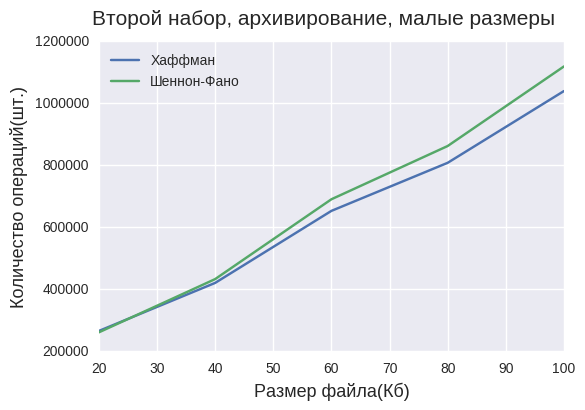

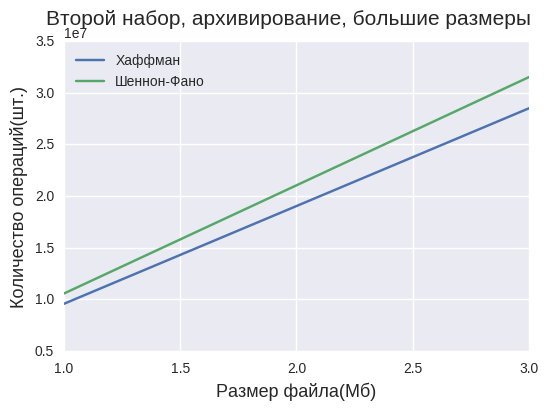

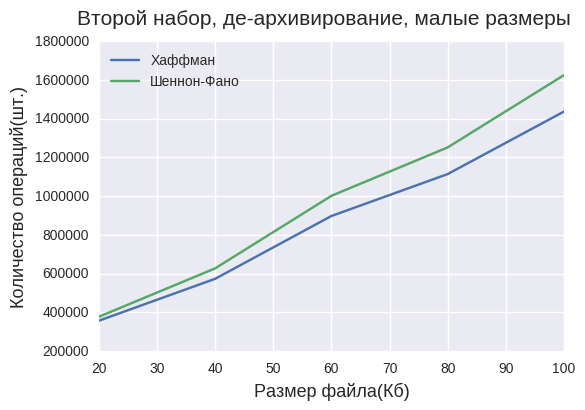

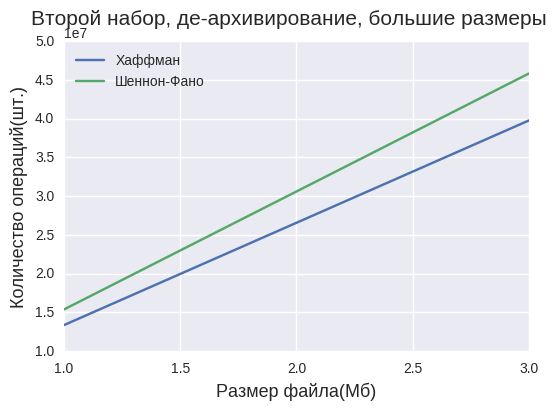

In [37]:
ind_small = s2_c_small['size'].unique()
ind_small.sort()
ind_big = s2_c_big['size'].unique()
ind_big.sort()

haff = s2_c_small[s2_c_small['algo'] == 'haff']
shan = s2_c_small[s2_c_small['algo'] == 'shan']

haff.sort(columns='operations', inplace=True)
shan.sort(columns='operations', inplace=True)

fig_1 = plt.figure()

gr_2_1_1_1, = plt.plot(ind_small, haff['operations'], label='Хаффман')
gr_2_1_1_2, = plt.plot(ind_small, shan['operations'], label='Шеннон-Фано')


plt.legend(loc=2)

fig_1.suptitle('Второй набор, архивирование, малые размеры', fontsize=15)
plt.xlabel('Размер файла(Кб)', fontsize=13)
plt.ylabel('Количество операций(шт.)', fontsize=13)

fig_1.savefig('figures/2_2_1_1.png', bbox_inches='tight')

# --------------------------------------------------------------------------------


haff = s2_c_big[s2_c_big['algo'] == 'haff']
shan = s2_c_big[s2_c_big['algo'] == 'shan']

haff.sort(columns='operations', inplace=True)
shan.sort(columns='operations', inplace=True)

fig_2 = plt.figure()

gr_2_1_2_1, = plt.plot(ind_big, haff['operations'], label='Хаффман')
gr_2_1_2_2, = plt.plot(ind_big, shan['operations'], label='Шеннон-Фано')


plt.legend(loc=2)

fig_2.suptitle('Второй набор, архивирование, большие размеры', fontsize=15)
plt.xlabel('Размер файла(Мб)', fontsize=13)
plt.ylabel('Количество операций(шт.)', fontsize=13)

fig_2.savefig('figures/2_2_1_2.png', bbox_inches='tight')

# --------------------------------------------------------------------------------


haff = s2_d_small[s2_d_small['algo'] == 'haff']
shan = s2_d_small[s2_d_small['algo'] == 'shan']

haff.sort(columns='operations', inplace=True)
shan.sort(columns='operations', inplace=True)

fig_3 = plt.figure()

gr_2_2_1_1, = plt.plot(ind_small, haff['operations'], label='Хаффман')
gr_2_2_1_2, = plt.plot(ind_small, shan['operations'], label='Шеннон-Фано')


plt.legend(loc=2)

fig_3.suptitle('Второй набор, де-архивирование, малые размеры', fontsize=15)
plt.xlabel('Размер файла(Кб)', fontsize=13)
plt.ylabel('Количество операций(шт.)', fontsize=13)

fig_3.savefig('figures/2_2_2_1.png', bbox_inches='tight')

# --------------------------------------------------------------------------------


haff = s2_d_big[s2_d_big['algo'] == 'haff']
shan = s2_d_big[s2_d_big['algo'] == 'shan']

haff.sort(columns='operations', inplace=True)
shan.sort(columns='operations', inplace=True)

fig_4 = plt.figure()

gr_2_2_2_1, = plt.plot(ind_big, haff['operations'], label='Хаффман')
gr_2_2_2_2, = plt.plot(ind_big, shan['operations'], label='Шеннон-Фано')


plt.legend(loc=2)

fig_4.suptitle('Второй набор, де-архивирование, большие размеры', fontsize=15)
plt.xlabel('Размер файла(Мб)', fontsize=13)
plt.ylabel('Количество операций(шт.)', fontsize=13)

fig_4.savefig('figures/2_2_2_2.png', bbox_inches='tight')

# --------------------------------------------------------------------------------

plt.show()

### Третий набор символов

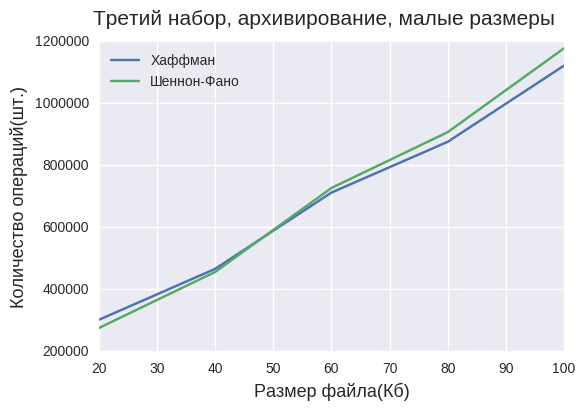

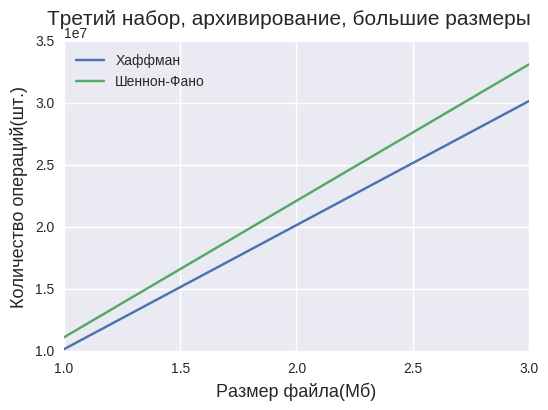

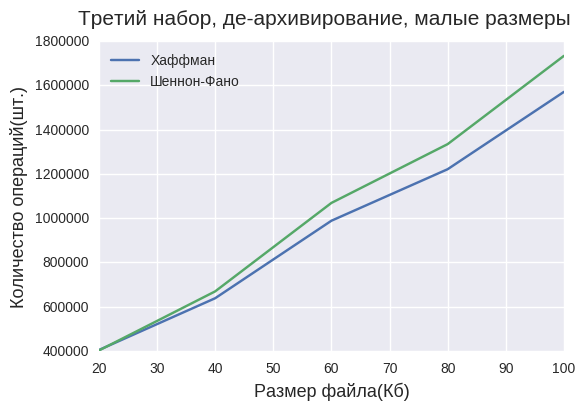

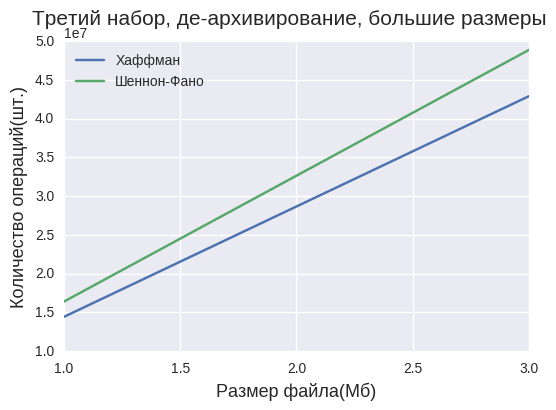

In [38]:
ind_small = s3_c_small['size'].unique()
ind_small.sort()
ind_big = s3_c_big['size'].unique()
ind_big.sort()

haff = s3_c_small[s3_c_small['algo'] == 'haff']
shan = s3_c_small[s3_c_small['algo'] == 'shan']

haff.sort(columns='operations', inplace=True)
shan.sort(columns='operations', inplace=True)

fig_1 = plt.figure()

gr_3_1_1_1, = plt.plot(ind_small, haff['operations'], label='Хаффман')
gr_3_1_1_2, = plt.plot(ind_small, shan['operations'], label='Шеннон-Фано')


plt.legend(loc=2)

fig_1.suptitle('Третий набор, архивирование, малые размеры', fontsize=15)
plt.xlabel('Размер файла(Кб)', fontsize=13)
plt.ylabel('Количество операций(шт.)', fontsize=13)

fig_1.savefig('figures/2_3_1_1.png', bbox_inches='tight')

# --------------------------------------------------------------------------------


haff = s3_c_big[s3_c_big['algo'] == 'haff']
shan = s3_c_big[s3_c_big['algo'] == 'shan']

haff.sort(columns='operations', inplace=True)
shan.sort(columns='operations', inplace=True)

fig_2 = plt.figure()

gr_3_1_2_1, = plt.plot(ind_big, haff['operations'], label='Хаффман')
gr_3_1_2_2, = plt.plot(ind_big, shan['operations'], label='Шеннон-Фано')


plt.legend(loc=2)

fig_2.suptitle('Третий набор, архивирование, большие размеры', fontsize=15)
plt.xlabel('Размер файла(Мб)', fontsize=13)
plt.ylabel('Количество операций(шт.)', fontsize=13)

fig_2.savefig('figures/2_3_1_2.png', bbox_inches='tight')

# --------------------------------------------------------------------------------


haff = s3_d_small[s3_d_small['algo'] == 'haff']
shan = s3_d_small[s3_d_small['algo'] == 'shan']

haff.sort(columns='operations', inplace=True)
shan.sort(columns='operations', inplace=True)

fig_3 = plt.figure()

gr_3_2_1_1, = plt.plot(ind_small, haff['operations'], label='Хаффман')
gr_3_2_1_2, = plt.plot(ind_small, shan['operations'], label='Шеннон-Фано')


plt.legend(loc=2)

fig_3.suptitle('Третий набор, де-архивирование, малые размеры', fontsize=15)
plt.xlabel('Размер файла(Кб)', fontsize=13)
plt.ylabel('Количество операций(шт.)', fontsize=13)

fig_3.savefig('figures/2_3_2_1.png', bbox_inches='tight')

# --------------------------------------------------------------------------------


haff = s3_d_big[s3_d_big['algo'] == 'haff']
shan = s3_d_big[s3_d_big['algo'] == 'shan']

haff.sort(columns='operations', inplace=True)
shan.sort(columns='operations', inplace=True)

fig_4 = plt.figure()

gr_3_2_2_1, = plt.plot(ind_big, haff['operations'], label='Хаффман')
gr_3_2_2_2, = plt.plot(ind_big, shan['operations'], label='Шеннон-Фано')


plt.legend(loc=2)

fig_4.suptitle('Третий набор, де-архивирование, большие размеры', fontsize=15)
plt.xlabel('Размер файла(Мб)', fontsize=13)
plt.ylabel('Количество операций(шт.)', fontsize=13)

fig_4.savefig('figures/2_3_2_2.png', bbox_inches='tight')

# --------------------------------------------------------------------------------

plt.show()

# Третий набор графиков

### Архивирование

In [196]:
huff_c_3 = df_new[(df_new['action'] == 'c') & (df_new['size'] == 3) & (df_new['algo'] == 'haff')]
shan_c_3 = df_new[(df_new['action'] == 'c') & (df_new['size'] == 3) & (df_new['algo'] == 'shan')]

huff_d_3 = df_new[(df_new['action'] == 'd') & (df_new['size'] == 3) & (df_new['algo'] == 'haff')]
shan_d_3 = df_new[(df_new['action'] == 'd') & (df_new['size'] == 3) & (df_new['algo'] == 'shan')]

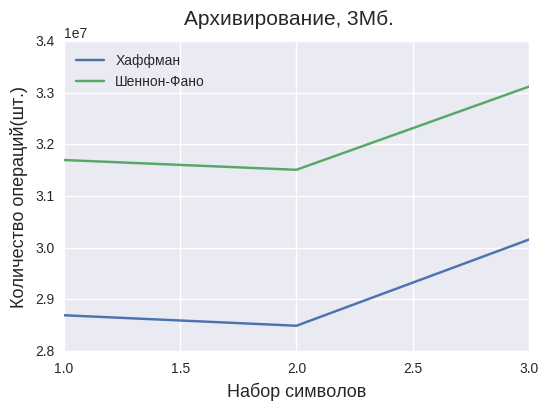

In [208]:
fig = plt.figure()

gr_1, = plt.plot([1, 2, 3], huff_c_3['operations'], label='Хаффман')
gr_2, = plt.plot([1, 2, 3], shan_c_3['operations'], label='Шеннон-Фано')


plt.legend(loc=2)

fig.suptitle('Архивирование, 3Мб.', fontsize=15)
plt.xlabel('Набор символов', fontsize=13)
plt.ylabel('Количество операций(шт.)', fontsize=13)

fig.savefig('figures/3_1.png', bbox_inches='tight')
plt.show()

### Де-архивирование

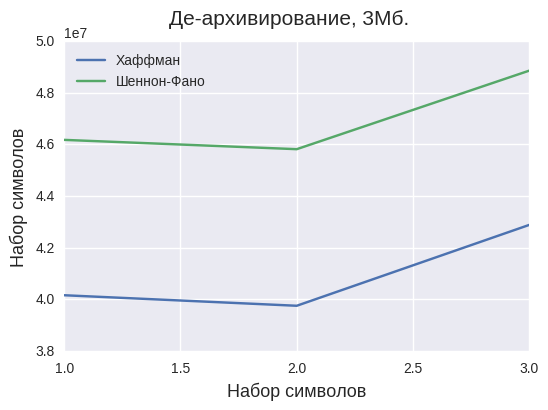

In [210]:
fig = plt.figure()

gr_1, = plt.plot([1, 2, 3], huff_d_3['operations'], label='Хаффман')
gr_2, = plt.plot([1, 2, 3], shan_d_3['operations'], label='Шеннон-Фано')

plt.legend(loc=2)

fig.suptitle('Де-архивирование, 3Мб.', fontsize=15)
plt.xlabel('Набор символов', fontsize=13)
plt.ylabel('Набор символов', fontsize=13)

fig.savefig('figures/3_2.png', bbox_inches='tight')
plt.show()

Исследование степени сжатия

In [6]:
df_new = pd.read_csv('filtered.csv', index_col=0)
df_new.head()

,name,old_size,new_size,operations,algo,set,action,num,size
201,set_100_1_1.haff,77611,106509,1427272,haff,1,d,1,100
154,set_100_2_1.haff,76829,106512,1435777,haff,2,d,1,100
215,set_100_3_1.haff,83701,106510,1570388,haff,3,d,1,100
151,set_1_1_1.haff,732537,1007739,13462131,haff,1,d,1,1
209,set_1_2_1.haff,724456,1007782,13341756,haff,2,d,1,1


In [7]:
df_new['compress'] = df_new['new_size'] / df_new['old_size']

In [39]:
df_txt = df_new[df_new['compress'] < 1]
df_txt.head()

,name,old_size,new_size,operations,algo,set,action,num,size,compress
56,set_100_1_1.txt,106509,77611,1021556,haff,1,c,1,100,0.728680
114,set_100_2_1.txt,106512,76829,1038584,haff,2,c,1,100,0.721318
50,set_100_3_1.txt,106510,83701,1120382,haff,3,c,1,100,0.785851
84,set_1_1_1.txt,1007739,732537,9619520,haff,1,c,1,1,0.726911
46,set_1_2_1.txt,1007782,724456,9568413,haff,2,c,1,1,0.718862


In [40]:
haff_small = df_txt[(df_txt['algo'] == 'haff') & (df_txt['size'] > 4)]
haff_big = df_txt[(df_txt['algo'] == 'haff') & (df_txt['size'] < 4)]

shan_small = df_txt[(df_txt['algo'] == 'shan') & (df_txt['size'] > 4)]
shan_big = df_txt[(df_txt['algo'] == 'shan') & (df_txt['size'] < 4)]

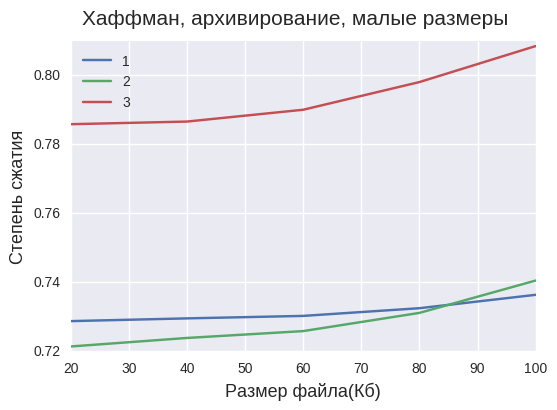

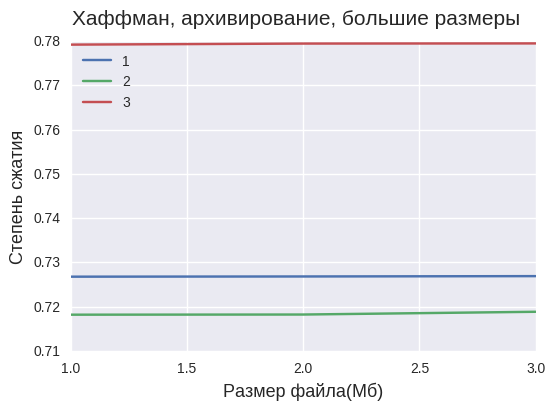

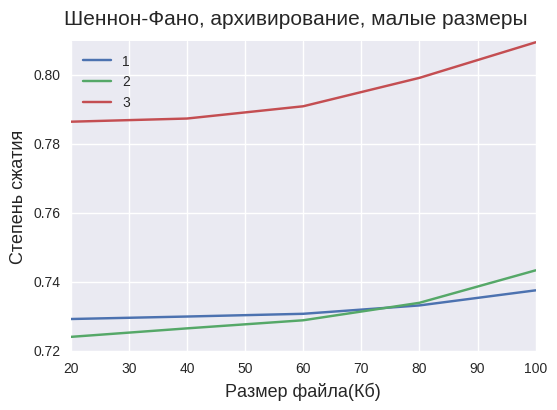

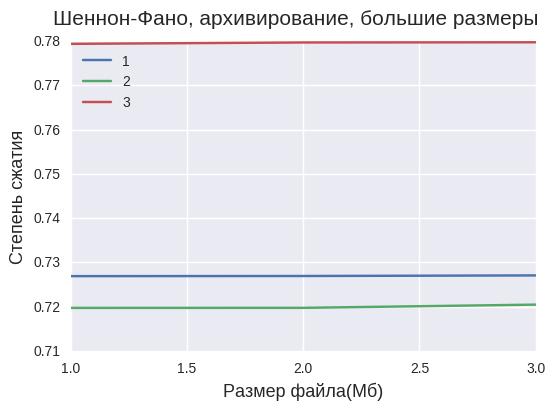

In [41]:
ind_small = haff_small['size'].unique()
ind_small.sort()
ind_big = haff_big['size'].unique()
ind_big.sort()

set_1 = haff_small[haff_small['set'] == 1]
set_2 = haff_small[haff_small['set'] == 2]
set_3 = haff_small[haff_small['set'] == 3]

set_1.sort(columns='compress', inplace=True)
set_2.sort(columns='compress', inplace=True)
set_3.sort(columns='compress', inplace=True)

fig = plt.figure()

gr_1, = plt.plot(ind_small, set_1['compress'], label='1')
gr_2, = plt.plot(ind_small, set_2['compress'], label='2')
gr_3, = plt.plot(ind_small, set_3['compress'], label='3')

plt.legend(loc=2)

fig.suptitle('Хаффман, архивирование, малые размеры', fontsize=15)
plt.xlabel('Размер файла(Кб)', fontsize=13)
plt.ylabel('Степень сжатия', fontsize=13)

fig.savefig('figures/dop/haff_arc_small.png', bbox_inches='tight')

# -------------------------------------------------------------------------

set_1 = haff_big[haff_big['set'] == 1]
set_2 = haff_big[haff_big['set'] == 2]
set_3 = haff_big[haff_big['set'] == 3]

set_1.sort(columns='compress', inplace=True)
set_2.sort(columns='compress', inplace=True)
set_3.sort(columns='compress', inplace=True)

fig1 = plt.figure()

gr_1, = plt.plot(ind_big, set_1['compress'], label='1')
gr_2, = plt.plot(ind_big, set_2['compress'], label='2')
gr_3, = plt.plot(ind_big, set_3['compress'], label='3')

plt.legend(loc=2)

fig1.suptitle('Хаффман, архивирование, большие размеры', fontsize=15)
plt.xlabel('Размер файла(Мб)', fontsize=13)
plt.ylabel('Степень сжатия', fontsize=13)

fig1.savefig('figures/dop/haff_arc_big.png', bbox_inches='tight')


# -------------------------------------------------------------------------

set_1 = shan_small[shan_small['set'] == 1]
set_2 = shan_small[shan_small['set'] == 2]
set_3 = shan_small[shan_small['set'] == 3]

set_1.sort(columns='compress', inplace=True)
set_2.sort(columns='compress', inplace=True)
set_3.sort(columns='compress', inplace=True)

fig2 = plt.figure()

gr_1, = plt.plot(ind_small, set_1['compress'], label='1')
gr_2, = plt.plot(ind_small, set_2['compress'], label='2')
gr_3, = plt.plot(ind_small, set_3['compress'], label='3')

plt.legend(loc=2)

fig2.suptitle('Шеннон-Фано, архивирование, малые размеры', fontsize=15)
plt.xlabel('Размер файла(Кб)', fontsize=13)
plt.ylabel('Степень сжатия', fontsize=13)

fig2.savefig('figures/dop/shan_arc_small.png', bbox_inches='tight')

# -------------------------------------------------------------------------

set_1 = shan_big[shan_big['set'] == 1]
set_2 = shan_big[shan_big['set'] == 2]
set_3 = shan_big[shan_big['set'] == 3]

set_1.sort(columns='compress', inplace=True)
set_2.sort(columns='compress', inplace=True)
set_3.sort(columns='compress', inplace=True)

fig3 = plt.figure()

gr_1, = plt.plot(ind_big, set_1['compress'], label='1')
gr_2, = plt.plot(ind_big, set_2['compress'], label='2')
gr_3, = plt.plot(ind_big, set_3['compress'], label='3')

plt.legend(loc=2)

fig3.suptitle('Шеннон-Фано, архивирование, большие размеры', fontsize=15)
plt.xlabel('Размер файла(Мб)', fontsize=13)
plt.ylabel('Степень сжатия', fontsize=13)

fig3.savefig('figures/dop/shan_arc_big.png', bbox_inches='tight')
plt.show()